In [1]:
%matplotlib inline

import os
from supporters import *
import SimpleITK as sitk
import nibabel as nib
print(f'SimpleITK version = {sitk.__version__}')

SimpleITK version = 2.3.0


In [2]:
ground_truth = sitk.ReadImage("D:/Documents/GitHub/VascuIAR/DeepLearning/data/MM_WHS/mask_images/ct_train_1017_label.nii.gz", sitk.sitkFloat32)
ground_truth = sitk.GetArrayFromImage(ground_truth)
ground_truth.shape

(283, 512, 512)

In [ ]:
explore_3D_array(ground_truth)

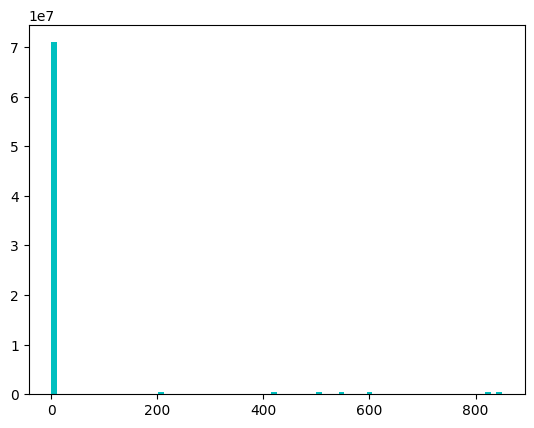

In [8]:
plt.hist(ground_truth.flatten(), bins=80, color='c')
plt.show()

In [4]:
array_1d = ground_truth.flatten()
unique_values, counts = np.unique(array_1d, return_counts=True)
print("Unique values:", unique_values) 
print("Counts:", counts)

Unique values: [  0. 205. 420. 500. 550. 600. 820. 850.]
Counts: [70937372   532569   467449   385079   515286   524488   443439   381070]


In [5]:
# Create a list to store the label arrays for each value
label_arrays = []

# Loop through the unique values
for value in unique_values: 
    # Make a copy of the original array 
    label_array = np.copy(ground_truth) 
    # Set the voxels that do not match the value to zero 
    label_array[np.where(label_array != value)] = 0 
    # Append the label array to the list 
    label_arrays.append(label_array)

# Print the label arrays
for i, label_array in enumerate(label_arrays): 
    print(f"Label {i+1} is a 3D array that contains only pixels with value {unique_values[i]} in array_3d:") 
    print(label_array.shape)

Label 1 is a 3D array that contains only pixels with value 0.0 in array_3d:
(283, 512, 512)
Label 2 is a 3D array that contains only pixels with value 205.0 in array_3d:
(283, 512, 512)
Label 3 is a 3D array that contains only pixels with value 420.0 in array_3d:
(283, 512, 512)
Label 4 is a 3D array that contains only pixels with value 500.0 in array_3d:
(283, 512, 512)
Label 5 is a 3D array that contains only pixels with value 550.0 in array_3d:
(283, 512, 512)
Label 6 is a 3D array that contains only pixels with value 600.0 in array_3d:
(283, 512, 512)
Label 7 is a 3D array that contains only pixels with value 820.0 in array_3d:
(283, 512, 512)
Label 8 is a 3D array that contains only pixels with value 850.0 in array_3d:
(283, 512, 512)


In [8]:
explore_3D_array_comparison(label_arrays[4], ground_truth)

interactive(children=(IntSlider(value=141, description='SLICE', max=282), Output()), _dom_classes=('widget-int…

In [20]:
out_path = 'D:/Documents/Segmentation/017/Segmentation_pulmonary.nii.gz'
converted_array = np.array(label_arrays[7], dtype=np.float32)
converted_array = np.transpose(converted_array, (2, 1, 0))
affine = np.eye(4)
nifti_file = nib.Nifti1Image(converted_array, affine)
nib.save(nifti_file, out_path)